Part c3. use the pure tensorflow keras  linear modules etc.,. - high level primitives and build neural network - make sure you use the Model subclassing (not the functional api or sequential api) as shown in the slides of the class. 

# Import Libraries

In [2]:
pip install tsne

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from typing import Callable
import matplotlib.pyplot as plt

# Custom Linear Layer Model

In [4]:
class Linear(keras.layers.Layer):

  def __init__(self, units=32):
      super(Linear, self).__init__()
      self.units = units

  def build(self, input_shape):
      self.w = self.add_weight(shape=(input_shape[-1], self.units),
                               initializer='random_normal',
                               trainable=True)
      self.b = self.add_weight(shape=(self.units,),
                               initializer='random_normal',
                               trainable=True)

  def call(self, inputs):
      return tf.matmul(inputs, self.w) + self.b

# Custom Model Subclassing

In [5]:
class MLP(keras.layers.Layer):
    """Simple stack of Linear layers."""

    def __init__(self):
        super(MLP, self).__init__()
        self.linear_1 = Linear(10)
        self.linear_2 = Linear(10)
        self.linear_3 = Linear(2)

    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)


# Train Loop

In [6]:

# Create a training step function.
@tf.function  # Make it fast.
def train_on_batch(model: Callable, optimizer: Callable, x, y):
  with tf.GradientTape() as tape:
    logits = model(x)
    loss = tf.keras.losses.MSE(y, logits)
    gradients = tape.gradient(loss, model.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model.trainable_weights))
  return loss

# Plot ouput on graph

In [7]:
#Plot using TSNE
from tsne import bh_sne
def tsne_plot(x_tensor, y_true_tensor):
  vis_data = bh_sne(x_tensor)
  # plot the result
  vis_x = vis_data[:, 0]
  vis_y = vis_data[:, 1]
  plt.scatter(vis_x, vis_y, c=y_true_tensor, cmap=plt.cm.get_cmap("jet", 10))
  plt.colorbar(ticks=range(10))
  plt.clim(-0.5, 9.5)
  plt.show()

# Begin Training

In [8]:
#Model initialisation
mlp = MLP()
#Input dimensions
d = 3
#No. of input records
n = 200
#initialising input
x = np.random.uniform(-1, 1, (n,d))
#Initialising weights
weights_true = np.array([[2 , -1, 1], [1, -1, 1]]).T
#initialising bias
bias_true = np.array([10])
#calculating the output based on the equation x^3 * w + x^2 * w + x * w + b
y_true = (x**3) @ weights_true + (x**2) @ weights_true + x @ weights_true + bias_true
#Convert the x and y into tensor
x_tensor = tf.convert_to_tensor(x)
y_true_tensor = tf.convert_to_tensor(y_true)

#Create a dataset object from the x and y value
dataset = tf.data.Dataset.from_tensor_slices((x_tensor, y_true_tensor))
dataset = dataset.shuffle(buffer_size=1024).batch(10)
print(dataset)

#initialising optimizers
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

#Training Loop
for step, (x1, y1) in enumerate(dataset):
  loss = train_on_batch(mlp, optimizer, x1, y1)
  print('Step:', step, 'Loss:', tf.math.reduce_mean(loss))

<BatchDataset shapes: ((None, 3), (None, 2)), types: (tf.float64, tf.float64)>
Step: 0 Loss: tf.Tensor(110.373314, shape=(), dtype=float32)
Step: 1 Loss: tf.Tensor(4.4392743, shape=(), dtype=float32)
Step: 2 Loss: tf.Tensor(3.063006, shape=(), dtype=float32)
Step: 3 Loss: tf.Tensor(10.409433, shape=(), dtype=float32)
Step: 4 Loss: tf.Tensor(3.6558907, shape=(), dtype=float32)
Step: 5 Loss: tf.Tensor(4.89808, shape=(), dtype=float32)
Step: 6 Loss: tf.Tensor(6.832821, shape=(), dtype=float32)
Step: 7 Loss: tf.Tensor(5.56276, shape=(), dtype=float32)
Step: 8 Loss: tf.Tensor(4.6842566, shape=(), dtype=float32)
Step: 9 Loss: tf.Tensor(3.2111294, shape=(), dtype=float32)
Step: 10 Loss: tf.Tensor(6.4375367, shape=(), dtype=float32)
Step: 11 Loss: tf.Tensor(6.3207464, shape=(), dtype=float32)
Step: 12 Loss: tf.Tensor(5.9310966, shape=(), dtype=float32)
Step: 13 Loss: tf.Tensor(7.5975695, shape=(), dtype=float32)
Step: 14 Loss: tf.Tensor(3.0398803, shape=(), dtype=float32)
Step: 15 Loss: tf.Ten

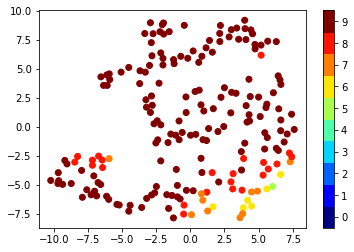

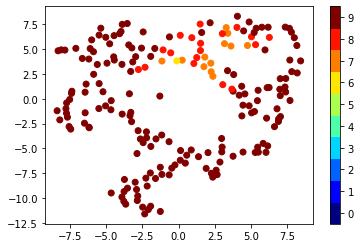

In [9]:
tsne_plot(x, y_true[:,0])
tsne_plot(x, y_true[:,1])